In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
%run dataset_gc.ipynb

DATASET LOADED
EnterpriseModelDatasetGC(110)


Processing...
Done!


In [16]:
torch.manual_seed(42)
dataset = dataset_gc.shuffle()

print()
print(f'Dataset: {dataset}:')
print('====================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')
dataset[0]


Dataset: EnterpriseModelDatasetGC(110):
Number of graphs: 110
Number of features: 1
Number of classes: 9


Data(x=[26, 1], edge_index=[2, 25], edge_attr=[25, 1], y=6)

In [4]:
torch.manual_seed(42)

balanced = False

while not balanced:
    dataset = dataset.shuffle()
    train_dataset = dataset[:int(len(dataset) * 0.6)]
    test_dataset = dataset[int(len(dataset) * 0.6):]
    
    train_ys = [0 for i in range(0,len(model_classes))]
    test_ys =[0 for i in range(0,len(model_classes))]

    for train_g in train_dataset:
        y = train_g.y
        train_ys[y] += 1


    for test_g in test_dataset:
        y = test_g.y
        test_ys[y] += 1
        
    if(0 not in train_ys and 1 not in train_ys and 0 not in test_ys and 1 not in test_ys):
        balanced = True


print(train_ys)
print(test_ys)
print("Datasets balanced!")

print(f'Number of graphs total: {len(dataset)}')
print(f'Number of training graphs: {len(train_dataset)}')
print(f'Number of test graphs: {len(test_dataset)}')

[4, 2, 8, 6, 7, 7, 25, 5, 2]
[3, 4, 2, 4, 4, 5, 18, 2, 2]
Datasets balanced!
Number of graphs total: 110
Number of training graphs: 66
Number of test graphs: 44


In [5]:
from torch_geometric.loader import DataLoader

NUM_GRAPHS_PER_BATCH = 32
NUM_HIDDEN_CHANNELS = 32

train_loader = DataLoader(train_dataset, batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=NUM_GRAPHS_PER_BATCH, shuffle=False)

In [6]:
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, GraphConv, SAGEConv, GATConv
from torch_geometric.nn import global_mean_pool


class Net(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(Net, self).__init__()
        torch.manual_seed(42)
        self.conv1 = SAGEConv(dataset.num_node_features, 2 * hidden_channels)
        self.conv2 = SAGEConv(2 * hidden_channels, 4 *  hidden_channels)
        self.conv3 = SAGEConv(4 * hidden_channels, 2 * hidden_channels)
        self.lin1 = Linear(2 * hidden_channels, hidden_channels)
        self.lin2 = Linear(hidden_channels, dataset.num_classes)

    def forward(self, x, edge_index, batch):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = self.conv2(x, edge_index)
        x = x.relu()
        x = self.conv3(x, edge_index)

        x = global_mean_pool(x, batch)  # [batch_size, hidden_channels]

        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin1(x)
        x = self.lin2(x)
        return x


Net(
  (conv1): SAGEConv(1, 64)
  (conv2): SAGEConv(64, 128)
  (conv3): SAGEConv(128, 64)
  (lin1): Linear(in_features=64, out_features=32, bias=True)
  (lin2): Linear(in_features=32, out_features=9, bias=True)
)
Number of parameters:  35529
Epoch: 001, Loss: 2.7661, Train Acc: 0.4394, Test Acc: 0.4318
Epoch: 002, Loss: 2.1588, Train Acc: 0.3788, Test Acc: 0.3864
Epoch: 003, Loss: 2.6516, Train Acc: 0.4394, Test Acc: 0.4318
Epoch: 004, Loss: 2.3881, Train Acc: 0.4545, Test Acc: 0.3864
Epoch: 005, Loss: 2.0536, Train Acc: 0.4091, Test Acc: 0.4091
Epoch: 006, Loss: 1.9193, Train Acc: 0.4545, Test Acc: 0.4318
Epoch: 007, Loss: 1.8493, Train Acc: 0.5152, Test Acc: 0.4545
Epoch: 008, Loss: 1.7954, Train Acc: 0.5000, Test Acc: 0.4545
Epoch: 009, Loss: 1.6486, Train Acc: 0.5758, Test Acc: 0.4773
Epoch: 010, Loss: 1.6602, Train Acc: 0.5455, Test Acc: 0.4545
Epoch: 011, Loss: 1.6421, Train Acc: 0.4848, Test Acc: 0.4545
Epoch: 012, Loss: 1.6473, Train Acc: 0.5152, Test Acc: 0.4545
Epoch: 013, Lo

Epoch: 132, Loss: 0.1944, Train Acc: 0.8939, Test Acc: 0.7273
Epoch: 133, Loss: 0.1988, Train Acc: 0.9091, Test Acc: 0.7273
Epoch: 134, Loss: 0.2915, Train Acc: 0.9091, Test Acc: 0.7500
Epoch: 135, Loss: 0.2672, Train Acc: 0.8939, Test Acc: 0.7500
Epoch: 136, Loss: 0.2839, Train Acc: 0.8939, Test Acc: 0.7500
Epoch: 137, Loss: 0.2700, Train Acc: 0.9091, Test Acc: 0.7727
Epoch: 138, Loss: 0.2427, Train Acc: 0.9394, Test Acc: 0.7955
Epoch: 139, Loss: 0.2563, Train Acc: 0.8939, Test Acc: 0.7727
Epoch: 140, Loss: 0.2053, Train Acc: 0.9242, Test Acc: 0.7727
Epoch: 141, Loss: 0.2228, Train Acc: 0.9394, Test Acc: 0.7727
Epoch: 142, Loss: 0.2746, Train Acc: 0.9394, Test Acc: 0.7273
Epoch: 143, Loss: 0.1810, Train Acc: 0.9394, Test Acc: 0.7045
Epoch: 144, Loss: 0.2791, Train Acc: 0.9394, Test Acc: 0.7273
Epoch: 145, Loss: 0.2450, Train Acc: 0.9697, Test Acc: 0.7500
Epoch: 146, Loss: 0.1543, Train Acc: 0.9394, Test Acc: 0.7500
Epoch: 147, Loss: 0.3175, Train Acc: 0.9848, Test Acc: 0.7727
Epoch: 1

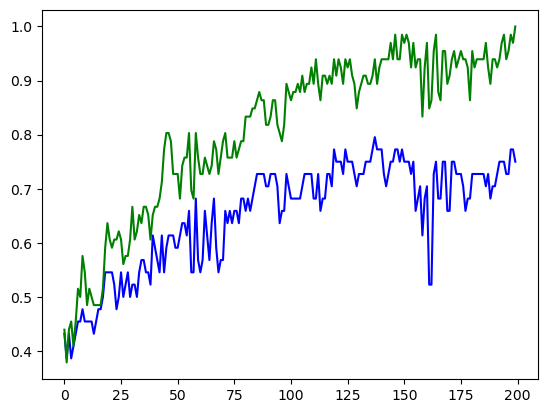

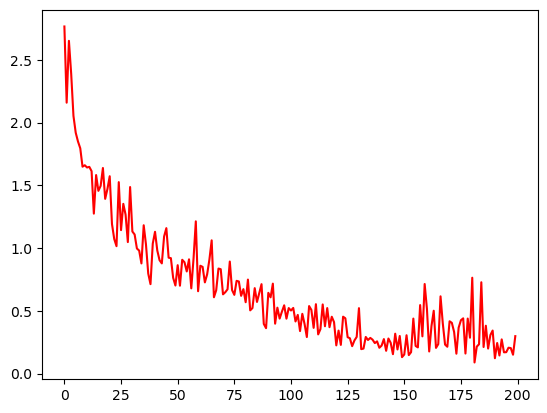

In [9]:
model = Net(hidden_channels=NUM_HIDDEN_CHANNELS)
print(model)
print("Number of parameters: ", sum(p.numel() for p in model.parameters()))

optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
criterion = torch.nn.CrossEntropyLoss()

def train():
    model.train()

    for data in train_loader:
        out = model(data.x, data.edge_index, data.batch)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        return loss

def test(loader):
    model.eval()
    correct = 0
    for data in loader:
        out = model(data.x, data.edge_index, data.batch)  
        pred = out.argmax(dim=1)
        correct += int((pred == data.y).sum())
    return correct / len(loader.dataset)

loss_values = []
train_acc_values = []
acc_values = []

for epoch in range(1, 201):
    loss = train()
    train_acc = test(train_loader)
    test_acc = test(test_loader)
        
    loss_values.append(loss)
    acc_values.append(test_acc)
    train_acc_values.append(train_acc)
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')
    if(test_acc > 0.81):
        break

plt.plot(acc_values, 'b', train_acc_values, 'g')
plt.savefig('acc_gc.png')
plt.show()

losses = [loss_values[i].item() for i in range(0, len(loss_values))]
plt.plot(losses, 'r')
plt.savefig('loss_gc.png')
plt.show()